In [13]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
data = pd.read_csv('Airline_data.csv')
N_years = len(data['Year'])
data_sim = {'N_years': N_years,
            'miles_flown': data['Miles flown [100 mln miles]'].values / 1000}
data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [23]:
model_prior=CmdStanModel(stan_file='model1_prior.stan')

R = 1000
sim=model_prior.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=1, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

sim.summary()

20:42:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:42:37 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
alpha_,2.994890,0.037488,1.198250,1.232090,1.155910,2.96274,4.958380,1005.190,941.313,1.00317
theta_,0.100267,0.000322,0.009875,0.009851,0.084489,0.10062,0.117425,934.267,944.195,1.00025
lambda[1],62.649800,3.877170,128.184000,28.619800,4.635660,28.43010,211.531000,1001.250,980.076,1.00335
lambda[2],65.477800,4.057540,134.122000,29.849300,4.868610,29.63780,221.595000,1001.220,980.076,1.00333
lambda[3],70.470900,4.376680,144.626000,32.211000,5.240570,31.89940,238.536000,1000.750,980.076,1.00337
lambda[4],73.782400,4.588780,151.606000,33.658000,5.485240,33.31250,249.712000,1000.370,980.076,1.00342
lambda[5],76.310700,4.750970,156.941000,34.793200,5.688660,34.38860,258.241000,1000.030,980.076,1.00342
lambda[6],78.021000,4.860790,160.554000,35.542700,5.826530,35.11600,264.008000,999.948,980.076,1.00343
lambda[7],76.798800,4.782310,157.972000,35.007200,5.727980,34.59610,259.887000,1000.040,980.076,1.00342
lambda[8],79.536200,4.958150,163.756000,36.225500,5.948880,35.79210,269.116000,1000.140,980.076,1.00342


In [24]:
df1 = sim.draws_pd()
df1

,chain__,iter__,draw__,lp__,accept_stat__,alpha_,theta_,lambda[1],lambda[2],lambda[3],...,accidents[1],accidents[2],accidents[3],accidents[4],accidents[5],accidents[6],accidents[7],accidents[8],accidents[9],accidents[10]
0,1.0,1.0,1.0,0.0,0.0,2.41173,0.098169,16.29660,17.01100,18.26940,...,21.0,17.0,20.0,13.0,31.0,18.0,16.0,20.0,27.0,24.0
1,1.0,2.0,2.0,0.0,0.0,1.92849,0.112865,10.63850,11.17640,12.13210,...,7.0,10.0,14.0,10.0,12.0,13.0,12.0,16.0,15.0,16.0
2,1.0,3.0,3.0,0.0,0.0,2.20946,0.086635,12.73210,13.22340,14.08300,...,18.0,7.0,15.0,22.0,11.0,18.0,23.0,12.0,19.0,15.0
3,1.0,4.0,4.0,0.0,0.0,3.14329,0.094861,33.43950,34.85480,37.34330,...,42.0,30.0,47.0,34.0,51.0,50.0,37.0,37.0,49.0,52.0
4,1.0,5.0,5.0,0.0,0.0,3.84368,0.086616,65.25350,67.77080,72.17550,...,64.0,79.0,57.0,62.0,84.0,76.0,68.0,80.0,84.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,996.0,996.0,0.0,0.0,2.75699,0.081382,21.57130,22.35230,23.71460,...,17.0,25.0,17.0,24.0,26.0,27.0,31.0,26.0,29.0,30.0
996,1.0,997.0,997.0,0.0,0.0,4.29125,0.098380,106.83500,111.52900,119.79800,...,94.0,112.0,113.0,110.0,124.0,131.0,126.0,147.0,169.0,154.0
997,1.0,998.0,998.0,0.0,0.0,3.76006,0.092202,61.32800,63.84950,68.27610,...,67.0,71.0,67.0,65.0,81.0,69.0,76.0,83.0,76.0,87.0
998,1.0,999.0,999.0,0.0,0.0,1.66602,0.118086,8.34936,8.79153,9.57962,...,9.0,18.0,10.0,5.0,13.0,13.0,13.0,11.0,17.0,13.0


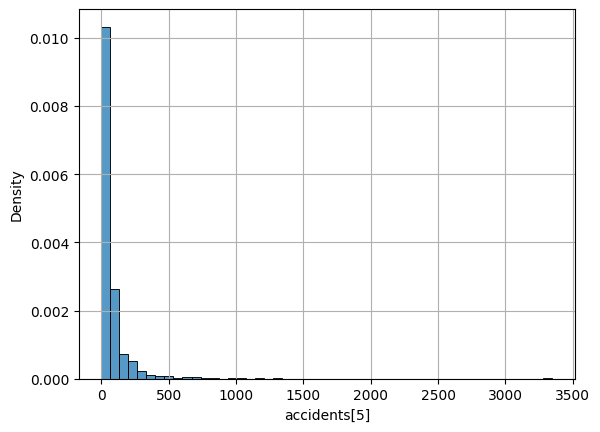

In [25]:
sns.histplot(data=df1, x=df1["accidents[5]"], stat="density", bins=50)
plt.grid()
plt.show()

In [18]:
data_sim2 = {'N_years': N_years,
            'miles_flown': data['Miles flown [100 mln miles]'].values / 1000,
            'y_fit': data['Fatal accidents'].values}

model_fit=CmdStanModel(stan_file='model1_fit.stan')

R = 1000
sim=model_fit.sample(data=data_sim2, 
                     iter_sampling=R, 
                     iter_warmup=1, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

sim.summary()

20:42:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:42:02 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
alpha_,0.234821,NaN,1.444010e-15,0,0.234821,0.234821,0.234821,NaN,NaN,NaN
theta_,-1.679340,NaN,8.219760e-15,0,-1.679340,-1.679340,-1.679340,NaN,NaN,NaN
lambda[1],0.001926,NaN,1.106440e-17,0,0.001926,0.001926,0.001926,NaN,NaN,NaN
lambda[2],0.000924,NaN,3.362710e-18,0,0.000924,0.000924,0.000924,NaN,NaN,NaN
lambda[3],0.000273,NaN,8.677960e-19,0,0.000273,0.000273,0.000273,NaN,NaN,NaN
lambda[4],0.000127,NaN,0.000000e+00,0,0.000127,0.000127,0.000127,NaN,NaN,NaN
lambda[5],0.000073,NaN,8.135590e-20,0,0.000073,0.000073,0.000073,NaN,NaN,NaN
lambda[6],0.000050,NaN,2.508470e-19,0,0.000050,0.000050,0.000050,NaN,NaN,NaN
lambda[7],0.000065,NaN,2.711860e-19,0,0.000065,0.000065,0.000065,NaN,NaN,NaN
lambda[8],0.000037,NaN,4.745760e-20,0,0.000037,0.000037,0.000037,NaN,NaN,NaN


In [19]:
df2 = sim.draws_pd()
df2

,chain__,iter__,draw__,lp__,accept_stat__,alpha_,theta_,lambda[1],lambda[2],lambda[3],...,accidents[1],accidents[2],accidents[3],accidents[4],accidents[5],accidents[6],accidents[7],accidents[8],accidents[9],accidents[10]
0,1.0,1.0,1.0,0.0,0.0,0.234821,-1.67934,0.001926,0.000924,0.000273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,2.0,0.0,0.0,0.234821,-1.67934,0.001926,0.000924,0.000273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,3.0,0.0,0.0,0.234821,-1.67934,0.001926,0.000924,0.000273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,4.0,0.0,0.0,0.234821,-1.67934,0.001926,0.000924,0.000273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,5.0,5.0,0.0,0.0,0.234821,-1.67934,0.001926,0.000924,0.000273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,996.0,996.0,0.0,0.0,0.234821,-1.67934,0.001926,0.000924,0.000273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,1.0,997.0,997.0,0.0,0.0,0.234821,-1.67934,0.001926,0.000924,0.000273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1.0,998.0,998.0,0.0,0.0,0.234821,-1.67934,0.001926,0.000924,0.000273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,1.0,999.0,999.0,0.0,0.0,0.234821,-1.67934,0.001926,0.000924,0.000273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
